In [1]:
from matplotlib import pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
    
# fix random seed for reproducibility
np.random.seed(7)


Using TensorFlow backend.


In [2]:
curve = np.vectorize(lambda x: x*10)

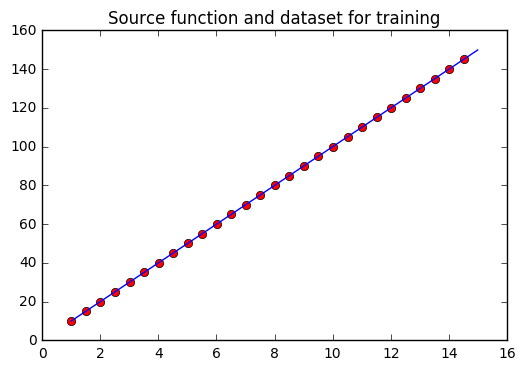

In [13]:
# Prepare our data and make chart
Xideal = np.arange(1, 15, 0.01)
Yideal = curve(Xideal)
X = Xideal[1::50]
Y = curve(X)
plt.title('Source function and dataset for training')
plt.plot(X, Y, 'ro')
plt.plot(Xideal, Yideal)
plt.show()


In [29]:
# Define model
model = Sequential()
model.add(Dense(1, activation='linear', input_dim=1))

# Compile it
model.compile(loss='mse', optimizer='sgd', metrics=['mse'])

# Fit
model.fit(X, Y, nb_epoch=100, batch_size=5, verbose=0)

# Evaluate the model
scores = model.evaluate(Xideal, Yideal)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))


1312/1400 [===========================>..] - ETA: 0s
mean_squared_error: 0.02%

loss: 0.02%


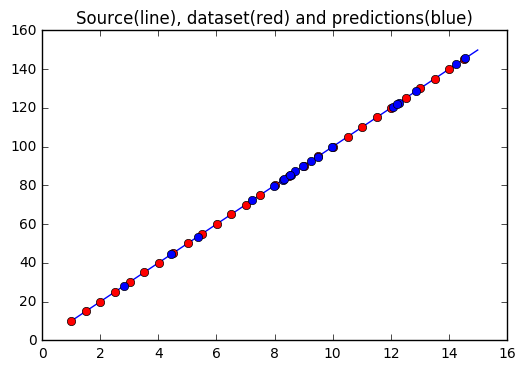

In [30]:
# Plot the chart with some predicted values
Xsample = np.random.choice(Xideal, size=20)
Ysample = model.predict(Xsample)[:,0]
plt.title('Source(line), dataset(red) and predictions(blue)')
plt.plot(Xideal, Yideal)
plt.plot(X, Y, 'ro')
plt.plot(Xsample, Ysample, 'bo')
plt.show()

In [31]:
# Display numbers in the table [expected, predicted, absdiff]
predictions = model.predict(Xideal)[:,0]
print(np.shape(Yideal), np.shape(predictions))
diff = np.vectorize(lambda x: "%.3f" % (x) )
sample = np.stack([Yideal, predictions, diff(abs(Yideal-predictions))], axis=-1)
print(sample, np.shape(sample))


(1400,) (1400,)
[['10.0' '10.029319763183594' '0.029']
 ['10.1' '10.129286766052246' '0.029']
 ['10.2' '10.229254722595215' '0.029']
 ..., 
 ['149.70000000000013' '149.68397521972656' '0.016']
 ['149.80000000000013' '149.783935546875' '0.016']
 ['149.90000000000012' '149.8839111328125' '0.016']] (1400, 3)
